In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import scipy

data = pd.read_csv('C:/Users/Shubhranil Mazumder/Downloads/gapminder.csv', low_memory=False)

data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')

In [3]:
data_clean = data.dropna()
scipy.stats.pearsonr(data_clean['employrate'], data_clean['internetuserate'])

PearsonRResult(statistic=-0.20084402120259573, pvalue=0.009916806362522766)

In [4]:
def incomegrp (row):
    if row['incomeperperson'] <= 744.239:
        return 1
    elif row['incomeperperson'] <= 9425.326:
        return 2
    elif row['incomeperperson'] > 9425.326:
        return 3

pd.options.mode.chained_assignment = None 
data_clean['incomegrp'] = data_clean.apply (lambda row: incomegrp (row),axis=1)
 
chk1 = data_clean['incomegrp'].value_counts(sort=False, dropna=False)
chk1

2    79
3    40
1    45
Name: incomegrp, dtype: int64

In [5]:
clean_sub1 = data_clean[(data_clean['incomegrp']== 1)]
clean_sub2 = data_clean[(data_clean['incomegrp']== 2)]
clean_sub3 = data_clean[(data_clean['incomegrp']== 3)]

In [6]:
scipy.stats.pearsonr(clean_sub1['employrate'], clean_sub1['internetuserate'])

PearsonRResult(statistic=-0.2742212957540561, pvalue=0.06832051283344724)

In [7]:
scipy.stats.pearsonr(clean_sub2['employrate'], clean_sub2['internetuserate'])

PearsonRResult(statistic=-0.2104773610864593, pvalue=0.06262271129345826)

In [8]:
scipy.stats.pearsonr(clean_sub3['employrate'], clean_sub3['internetuserate'])

PearsonRResult(statistic=0.35072774778729066, pvalue=0.026495462291722307)

Text(0.5, 1.0, 'Scatterplot for the Association Between Employment Rate and Internet Use Rate for LOW income countries')

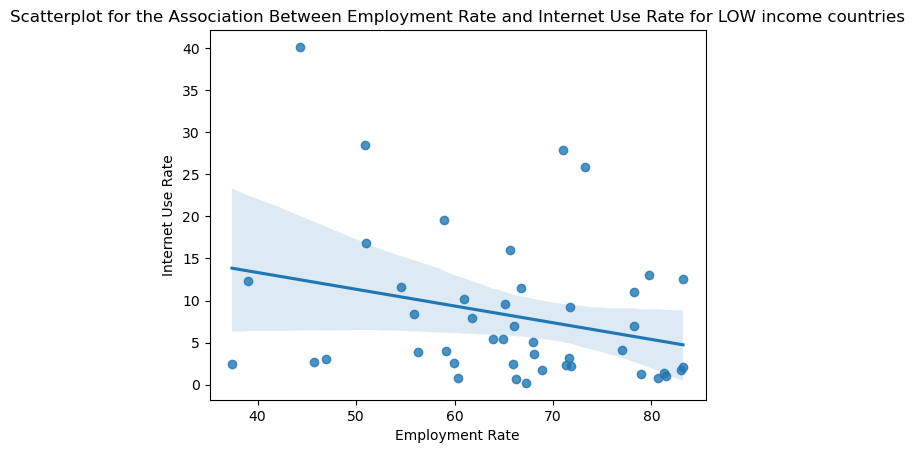

In [9]:
scat1 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub1)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for LOW income countries')


Text(0.5, 1.0, 'Scatterplot for the Association Between Employment Rate and Internet Use Rate for MIDDLE income countries')

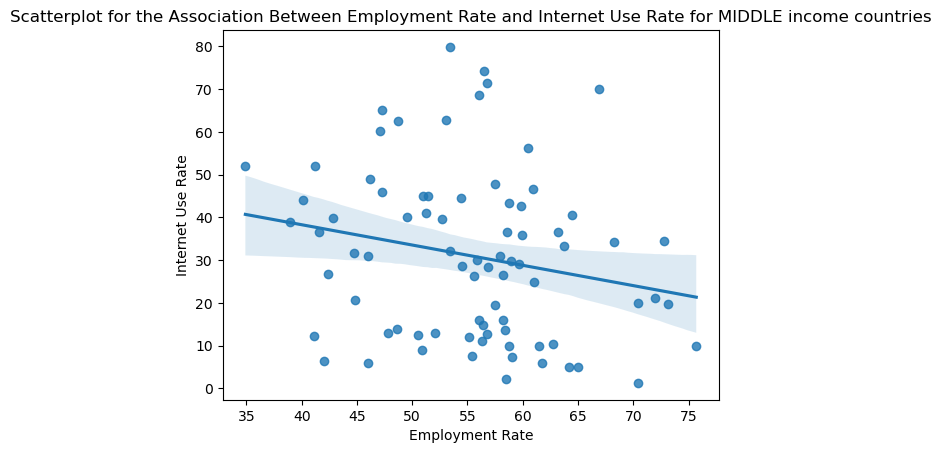

In [10]:
scat2 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub2)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for MIDDLE income countries')


Text(0.5, 1.0, 'Scatterplot for the Association Between Employment Rate and Internet Use Rate for HIGH income countries')

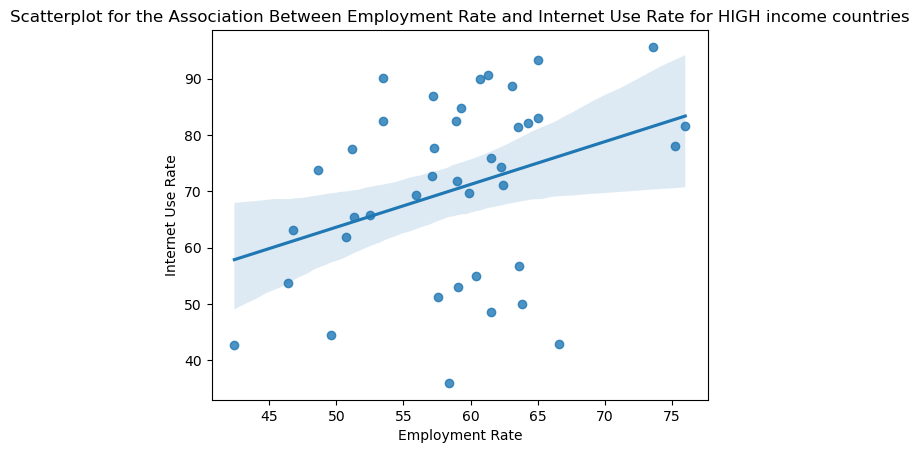

In [11]:
scat3 = sns.regplot(x="employrate", y="internetuserate", data=clean_sub3)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for HIGH income countries')
